In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [3]:
data = pd.read_csv("spam_Emails_data.csv", sep = ',')

In [4]:
data.isnull().sum()

label    0
text     2
dtype: int64

In [5]:
data = data.dropna(subset = ['label', 'text']).reset_index(drop = True)

In [6]:
data['text'] = data['text'].str.lower()

X = data['text']
Y = data['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [7]:
vectorizer = TfidfVectorizer()

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [8]:
sc = StandardScaler(with_mean=False)

X_train_scaled = sc.fit_transform(X_train_vectorized)
X_test_scaled = sc.transform(X_test_vectorized)

In [10]:
import time
start_time = time.time()

rf_classifier = RandomForestClassifier(n_estimators=30, random_state=42)
rf_classifier.fit(X_train_scaled, Y_train)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 2170.9549033641815 seconds


Accuracy: 0.9768377611555327
Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      0.99      0.98     20317
        Spam       0.99      0.96      0.98     18453

    accuracy                           0.98     38770
   macro avg       0.98      0.98      0.98     38770
weighted avg       0.98      0.98      0.98     38770



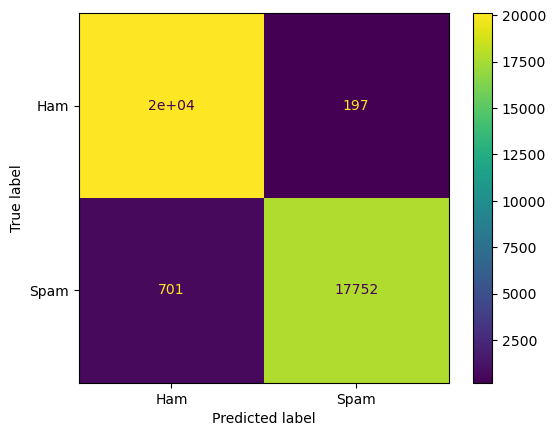

In [11]:
y_pred = rf_classifier.predict(X_test_scaled)

accuracy = accuracy_score(Y_test, y_pred)
conf_m = confusion_matrix(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

print(f"Accuracy: {accuracy}")

print(f"Classification Report:")
print(report)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=rf_classifier.classes_)
disp.plot()
plt.show()

In [12]:
labels = data['label']

In [13]:
data_1000 = X_train_scaled[0:1000, :]
labels_1000 = labels[0:1000]

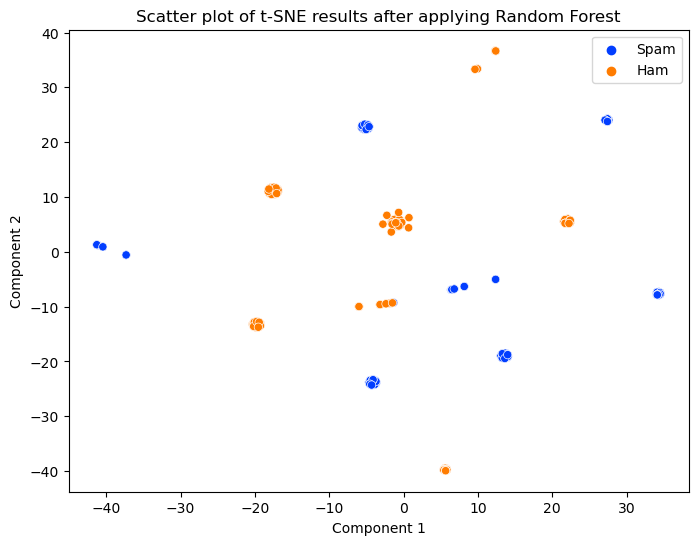

In [14]:
rf_classifier.fit(data_1000, labels_1000)

transformed_data = rf_classifier.predict_proba(data_1000)

tsne_model = TSNE(n_components=2, random_state=0, init='random')
tsne_data = tsne_model.fit_transform(transformed_data)

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Scatter plot of t-SNE results after applying Random Forest")
plt.legend()
plt.show()